# Evaluate the inverse design with fragment prompts

In [1]:
from glob import glob 
from fastcore.helpers import load_pickle
import matplotlib.pyplot as plt 
plt.style.use(['science', 'nature'])
import numpy as np 
import pandas as pd 

The main plot is probably the found ratio / prevalence as a function of the temperature for different functional groups.

In [33]:
all_res = glob('/Users/kevinmaikjablonka/git/kjappelbaum/gpt3forchem/experiments/results/20221206_generate_with_fragment/*.pkl')

In [34]:
all_res

['/Users/kevinmaikjablonka/git/kjappelbaum/gpt3forchem/experiments/results/20221206_generate_with_fragment/20221206-120046_C(=O).pkl',
 '/Users/kevinmaikjablonka/git/kjappelbaum/gpt3forchem/experiments/results/20221206_generate_with_fragment/20221206-180420_Br.pkl',
 '/Users/kevinmaikjablonka/git/kjappelbaum/gpt3forchem/experiments/results/20221206_generate_with_fragment/20221206-140021_CO.pkl',
 '/Users/kevinmaikjablonka/git/kjappelbaum/gpt3forchem/experiments/results/20221206_generate_with_fragment/20221206-160434_C#C.pkl',
 '/Users/kevinmaikjablonka/git/kjappelbaum/gpt3forchem/experiments/results/20221206_generate_with_fragment/20221206-100332_C(=O).pkl']

In [35]:
cres = {}

for r in all_res[:-1]: 
    res = load_pickle(r)
    cres[res['fragment']] = {
        'fragment_in_smiles': [ri['fragment_in_smiles']/res['prevalence'] for ri in res['analysis']],
        'p_value': [ri['p_value'] for ri in  res['analysis']],
        'temperatures': [ri['temperature'] for ri in  res['analysis']],
    }
    

In [36]:
cres

{'C(=O)': {'fragment_in_smiles': [0.0,
   1.3120989722369487,
   1.1913592903146732,
   1.0990519741675473,
   1.0110558195915333,
   0.9274412247102332,
   0.8887122905521047,
   0.8049692985693462,
   0.5250415279439887],
  'p_value': [nan,
   0.013383883418461532,
   8.59176588682188e-06,
   6.828020124265942e-05,
   0.4943239223690482,
   1.1382213628318588e-05,
   5.7443104554502307e-11,
   1.6683201858232043e-21,
   7.506652215500865e-36],
  'temperatures': [0, 0.05, 0.15, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5]},
 'Br': {'fragment_in_smiles': [0.0,
   0.9942713636055115,
   0.6767729449751801,
   0.7781254149956177,
   0.719210852415868,
   1.4615789045001017,
   1.8122712741049356,
   2.7948559426280957,
   3.256969797693054],
  'p_value': [nan,
   1.0,
   0.25840522642787284,
   0.21438553635980662,
   0.02909422293762313,
   0.00011349446718435515,
   1.9060415555143799e-10,
   9.29155432891628e-33,
   1.255955426088358e-13],
  'temperatures': [0, 0.05, 0.15, 0.25, 0.5, 0.75, 1.0, 1

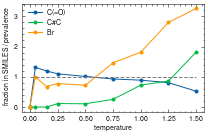

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
plt.plot(cres['C(=O)']['temperatures'], cres['C(=O)']['fragment_in_smiles'], label='C(=O)', marker='o')
#plt.plot(cres['CO']['temperatures'], cres['CO']['fragment_in_smiles'], label='CO')
plt.plot(cres['C#C']['temperatures'], cres['C#C']['fragment_in_smiles'], label='C\#C', marker='o')
plt.plot(cres['Br']['temperatures'], cres['Br']['fragment_in_smiles'], label='Br',  marker='o')
plt.xlabel('temperature')
plt.ylabel('fraction in SMILES / prevalence')
plt.hlines(1, 0, 1.5, linestyle='--', color='grey')
plt.legend()
plt.tight_layout()
plt.savefig('20221206_fragment_in_smiles.pdf', bbox_inches='tight')

In [19]:
plt.plot(cres['C(=O)']['temperatures'], cres['C(=O)']['fragment_in_smiles'], label='C(=O)')

[]